In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

import matplotlib.pyplot as plt
import sklearn


In [5]:
# 

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

# train images are the training set
# test images are the ones we test after the model is trained.

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
len(train_images[0].shape)

2

In [8]:
train_labels
# 60,000 pictures for training data

test_labels
# 10,000 pictures for testing data

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

In [10]:
test_images.shape
# for train images, 60000 pictures - 60k pictures, where each picture 
# itself is a 28 by 28 picture

(10000, 28, 28)

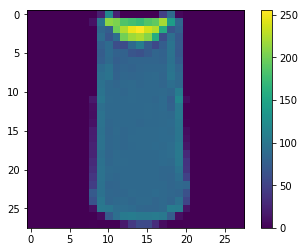

In [11]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)

In [12]:
# pixels are labeled between 0 and 255
train_images = train_images / 255.0
test_images = test_images / 255.0

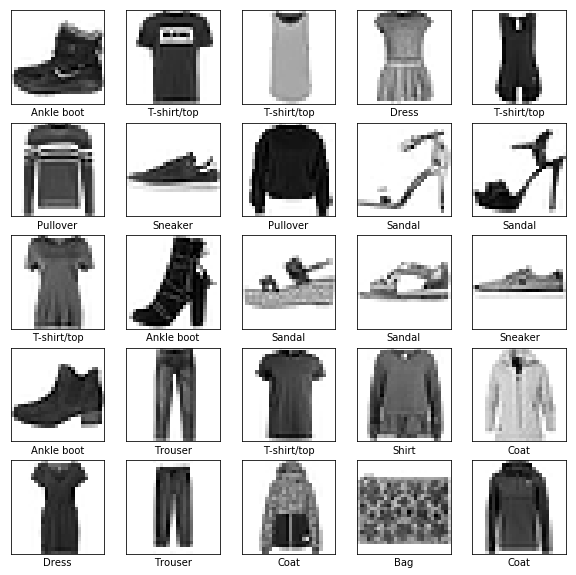

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # image show the training images
    plt.xlabel(class_names[train_labels[i]])

In [14]:
# implementing the actual neural network.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # takes the inputs (each picture) and flattens
    # them out 784 pixels and neurons
    # unstacking each value of the pixel
    
    keras.layers.Dense(128, activation=tf.nn.relu),
    # first layer of 128 neurons, ReLU activation function
    keras.layers.Dense(10, activation=tf.nn.softmax)
    # last layer is 10 neurons where each one is a different probability
    # based on the chance that the picture is in 1 of 10 categories
])

In [15]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.5016 - acc: 0.8236
Epoch 2/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.3744 - acc: 0.8663
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3369 - acc: 0.8774
Epoch 4/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.3119 - acc: 0.8851
Epoch 5/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.2953 - acc: 0.8914
Epoch 6/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2807 - acc: 0.8961
Epoch 7/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.2678 - acc: 0.9006
Epoch 8/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.2582 - acc: 0.9051
Epoch 9/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.2492 - acc: 0.9071
Epoch 10/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.2392 - acc: 0.9104

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 31us/step
Test accuracy: 0.8834


In [18]:
predictions = model.predict(test_images)
# 10000 images, each one has confidence associated with each one 

np.argmax(predictions[1])

class_names[9]

test_labels[0]
# array for each image

9

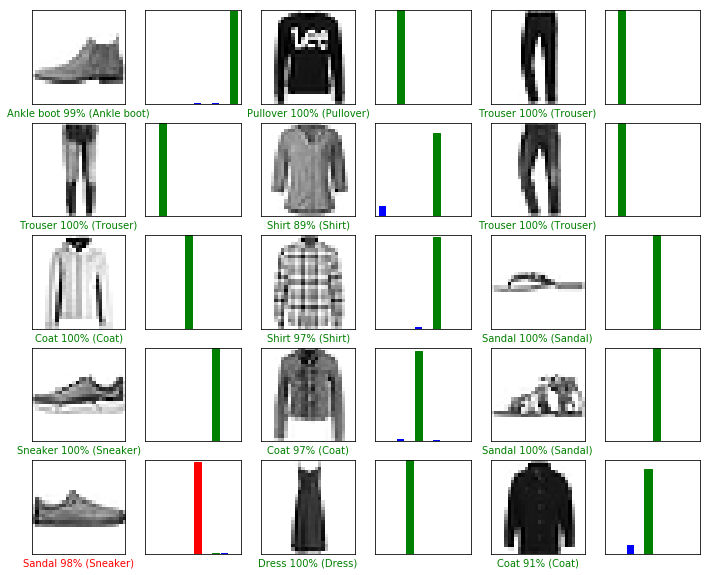

In [19]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)
    
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='blue')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
    

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

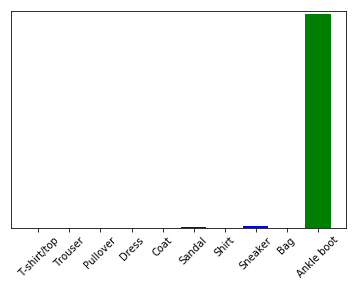

In [20]:
img = test_images[0]
img = (np.expand_dims(img,0))

predictions_single = model.predict(img)
predictions_single

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [273]:
# Now time to mess around with NBA data
nba = pd.read_csv('https://raw.githubusercontent.com/peasant98/TheNBACSV/master/nbaNew.csv')
nba.head()

,#,SeasonStart,PlayerName,PlayerSalary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,8035.0,1986.0,A.C. Green,NaN,PF,22.0,LAL,82.0,1.0,1542.0,...,61.10%,160.0,221.0,381.0,54.0,49.0,49.0,99.0,229.0,521.0
1,8420.0,1987.0,A.C. Green,NaN,PF,23.0,LAL,79.0,72.0,2240.0,...,78.00%,210.0,405.0,615.0,84.0,70.0,80.0,102.0,171.0,852.0
2,8807.0,1988.0,A.C. Green,NaN,PF,24.0,LAL,82.0,64.0,2636.0,...,77.30%,245.0,465.0,710.0,93.0,87.0,45.0,120.0,204.0,937.0
3,9242.0,1989.0,A.C. Green,NaN,PF,25.0,LAL,82.0,82.0,2510.0,...,78.60%,258.0,481.0,739.0,103.0,94.0,55.0,119.0,172.0,1088.0
4,9688.0,1990.0,A.C. Green,"$1,750,000.00",PF,26.0,LAL,82.0,82.0,2709.0,...,75.10%,262.0,450.0,712.0,90.0,66.0,50.0,116.0,207.0,1061.0


In [278]:
prettyGood = nba.loc[(nba['G']>50) & (nba['PER']> 18)]
# players with high Per and have played enough games
prettyGood

,#,SeasonStart,PlayerName,PlayerSalary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
111,5881.0,1980.0,Abdul Jeelani,NaN,SF,25.0,POR,77.0,NaN,1286.0,...,78.90%,114.0,156.0,270.0,95.0,40.0,40.0,117.0,155.0,737.0
181,4721.0,1977.0,Adrian Dantley*,NaN,SF,20.0,BUF,77.0,NaN,2816.0,...,81.80%,251.0,336.0,587.0,144.0,91.0,15.0,NaN,215.0,1564.0
182,5088.0,1978.0,Adrian Dantley*,NaN,SF,21.0,TOT,79.0,NaN,2933.0,...,79.60%,265.0,355.0,620.0,253.0,118.0,24.0,228.0,233.0,1697.0
184,5090.0,1978.0,Adrian Dantley*,NaN,SF,21.0,LAL,56.0,NaN,1985.0,...,80.10%,171.0,233.0,404.0,188.0,70.0,7.0,161.0,157.0,1088.0
185,5458.0,1979.0,Adrian Dantley*,NaN,SF,22.0,LAL,60.0,NaN,1775.0,...,85.40%,131.0,211.0,342.0,138.0,63.0,12.0,155.0,162.0,1040.0
186,5807.0,1980.0,Adrian Dantley*,NaN,SF,23.0,UTA,68.0,NaN,2674.0,...,84.20%,183.0,333.0,516.0,191.0,96.0,14.0,233.0,211.0,1903.0
187,6152.0,1981.0,Adrian Dantley*,NaN,SF,24.0,UTA,80.0,NaN,3417.0,...,80.60%,192.0,317.0,509.0,322.0,109.0,18.0,282.0,245.0,2452.0
188,6521.0,1982.0,Adrian Dantley*,NaN,SF,25.0,UTA,81.0,81.0,3222.0,...,79.20%,231.0,283.0,514.0,324.0,95.0,14.0,299.0,252.0,2457.0
190,7274.0,1984.0,Adrian Dantley*,NaN,SF,27.0,UTA,79.0,79.0,2984.0,...,85.90%,179.0,269.0,448.0,310.0,61.0,4.0,263.0,201.0,2418.0
191,7622.0,1985.0,Adrian Dantley*,NaN,SF,28.0,UTA,55.0,46.0,1971.0,...,80.40%,148.0,175.0,323.0,186.0,57.0,8.0,171.0,133.0,1462.0


Ok, so let's use a simple neural network to see what an expected player's position is; based on their stats. Normalizing the data across every player also would make sense (and be computationally less expensive), so I'll scale the data down linearly. I also am basing my data from players who have played in enough games and have an above average PER.

In [279]:
df = prettyGood.assign(PPG=lambda x: x['PTS']/x['G'])
# adding in a column for 
z = df.dropna(subset=['TRB', 'PPG', 'AST', 'STL', 'BLK', 'TOV', 'Pos'])
# check to get rid of np.nan values in stats

In [280]:
z

,#,SeasonStart,PlayerName,PlayerSalary,Pos,Age,Tm,G,GS,MP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG
111,5881.0,1980.0,Abdul Jeelani,NaN,SF,25.0,POR,77.0,NaN,1286.0,...,114.0,156.0,270.0,95.0,40.0,40.0,117.0,155.0,737.0,9.571429
182,5088.0,1978.0,Adrian Dantley*,NaN,SF,21.0,TOT,79.0,NaN,2933.0,...,265.0,355.0,620.0,253.0,118.0,24.0,228.0,233.0,1697.0,21.481013
184,5090.0,1978.0,Adrian Dantley*,NaN,SF,21.0,LAL,56.0,NaN,1985.0,...,171.0,233.0,404.0,188.0,70.0,7.0,161.0,157.0,1088.0,19.428571
185,5458.0,1979.0,Adrian Dantley*,NaN,SF,22.0,LAL,60.0,NaN,1775.0,...,131.0,211.0,342.0,138.0,63.0,12.0,155.0,162.0,1040.0,17.333333
186,5807.0,1980.0,Adrian Dantley*,NaN,SF,23.0,UTA,68.0,NaN,2674.0,...,183.0,333.0,516.0,191.0,96.0,14.0,233.0,211.0,1903.0,27.985294
187,6152.0,1981.0,Adrian Dantley*,NaN,SF,24.0,UTA,80.0,NaN,3417.0,...,192.0,317.0,509.0,322.0,109.0,18.0,282.0,245.0,2452.0,30.650000
188,6521.0,1982.0,Adrian Dantley*,NaN,SF,25.0,UTA,81.0,81.0,3222.0,...,231.0,283.0,514.0,324.0,95.0,14.0,299.0,252.0,2457.0,30.333333
190,7274.0,1984.0,Adrian Dantley*,NaN,SF,27.0,UTA,79.0,79.0,2984.0,...,179.0,269.0,448.0,310.0,61.0,4.0,263.0,201.0,2418.0,30.607595
191,7622.0,1985.0,Adrian Dantley*,NaN,SF,28.0,UTA,55.0,46.0,1971.0,...,148.0,175.0,323.0,186.0,57.0,8.0,171.0,133.0,1462.0,26.581818
192,7995.0,1986.0,Adrian Dantley*,NaN,SF,29.0,UTA,76.0,75.0,2744.0,...,178.0,217.0,395.0,264.0,64.0,4.0,231.0,206.0,2267.0,29.828947


In [281]:
# key stats: TRB, AST, STL, BLK, PPG, TOV
# taking care of the simple stats here
players = z[['Pos', 'PlayerName', 'SeasonStart']]

playerStats = z[['PPG', 'BLK', 'STL', 'TOV', 'TRB', 'AST' ]]
players.head()
players.min()

players_norm = (playerStats - playerStats.min()) / (playerStats.max() - playerStats.min())
# creating a easier to digest dataframe of the starts that we're looking for.
players_norm

dff = players.assign(Blocks = players_norm['BLK'], Steals = players_norm['STL'], Assists = players_norm['AST'], 
                     Turnovers = players_norm['TOV'], Rebounds = players_norm['TRB'], PointsPerGame = players_norm['PPG'])

tupList = [(i, playerStats[i].min(), playerStats[i].max()) for i in playerStats]


tupList
# list of the extremes for ppg, trb, stls, blks, tov, ast
# that will be used to normalize the user input data

[('PPG', 2.8627450980392157, 37.08536585365854),
 ('BLK', 0.0, 376.0),
 ('STL', 7.0, 301.0),
 ('TOV', 14.0, 464.0),
 ('TRB', 71.0, 1444.0),
 ('AST', 7.0, 1164.0)]

Well, here's our dataframe, after dropping the null values, and normalizing that stats fro the neural network.


In [282]:
len(dff)
totalAmt = int(len(dff) * (1/6))
#dff.iloc[0 : 10]
totalAmt
# amount for testing data

271

In [283]:
testingDFF = dff.iloc[len(dff)-totalAmt : len(dff)]
testingDFF
# testing dataframe data

,Pos,PlayerName,SeasonStart,Blocks,Steals,Assists,Turnovers,Rebounds,PointsPerGame
20500,SF,Ruben Patterson,2007.0,0.066489,0.350340,0.194468,0.411111,0.268755,0.347080
20517,SF,Rudy Gay,2014.0,0.148936,0.299320,0.174589,0.466667,0.266570,0.499557
20519,SF,Rudy Gay,2014.0,0.087766,0.204082,0.140017,0.335556,0.169701,0.504477
20520,SF,Rudy Gay,2015.0,0.109043,0.217687,0.210026,0.375556,0.238893,0.531697
20524,C,Rudy Gobert,2015.0,0.502660,0.193878,0.088159,0.215556,0.512746,0.160803
20526,C,Rudy Gobert,2017.0,0.569149,0.142857,0.077787,0.297778,0.702112,0.326518
20588,PG,Russell Westbrook,2011.0,0.079787,0.503401,0.573034,0.671111,0.224326,0.555279
20589,PG,Russell Westbrook,2012.0,0.055851,0.357143,0.306828,0.500000,0.167516,0.606129
20590,PG,Russell Westbrook,2013.0,0.063830,0.469388,0.518583,0.575556,0.260015,0.594477
20592,PG,Russell Westbrook,2015.0,0.037234,0.452381,0.490061,0.620000,0.303714,0.738883


In [284]:
trainingDFF = dff.iloc[0 : len(dff)-totalAmt]
trainingDFF.head()
# training dataframe data

,Pos,PlayerName,SeasonStart,Blocks,Steals,Assists,Turnovers,Rebounds,PointsPerGame
111,SF,Abdul Jeelani,1980.0,0.106383,0.112245,0.076059,0.228889,0.144938,0.196031
182,SF,Adrian Dantley*,1978.0,0.063830,0.377551,0.212619,0.475556,0.399854,0.544034
184,SF,Adrian Dantley*,1978.0,0.018617,0.214286,0.156439,0.326667,0.242535,0.484061
185,SF,Adrian Dantley*,1979.0,0.031915,0.190476,0.113224,0.313333,0.197378,0.422837
186,SF,Adrian Dantley*,1980.0,0.037234,0.302721,0.159032,0.486667,0.324108,0.734092


In [285]:
tupList
# where's tupList

[('PPG', 2.8627450980392157, 37.08536585365854),
 ('BLK', 0.0, 376.0),
 ('STL', 7.0, 301.0),
 ('TOV', 14.0, 464.0),
 ('TRB', 71.0, 1444.0),
 ('AST', 7.0, 1164.0)]

In [286]:
# inputs for the dataframe = blocks, steals, assists, turnovers, rebounds, ppg

#output is based on a label of the position

# trainingDFF

# testingDFF
positions = list(trainingDFF['Pos'].unique()) + list(testingDFF['Pos'].unique())
labels = list(set(positions))
len(labels)

8

In [287]:
testingDFF['Pos'].unique()


array(['SF', 'C', 'PG', 'PF', 'SG', 'SF-SG'], dtype=object)

In [288]:
matches = {}
for ind,val in enumerate(labels):
    matches[val] = ind
matches


{'SF-SG': 0, 'SG-PG': 1, 'PG': 2, 'PF': 3, 'PF-C': 4, 'SF': 5, 'SG': 6, 'C': 7}

In [289]:
x = np.array([1,2,3,4,5,6])
x.shape

(6,)

In [290]:
tupList

[('PPG', 2.8627450980392157, 37.08536585365854),
 ('BLK', 0.0, 376.0),
 ('STL', 7.0, 301.0),
 ('TOV', 14.0, 464.0),
 ('TRB', 71.0, 1444.0),
 ('AST', 7.0, 1164.0)]

In [291]:
# implementing the actual neural network.
ish = trainingInputs[0].shape
nbaModel = keras.Sequential([
    keras.layers.Flatten(input_shape=(6,)),
    #keras.layers.Dense(6, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    # first layer of 128 neurons, ReLU activation function
    keras.layers.Dense(8, activation=tf.nn.softmax)
    # last layer is 10 neurons where each one is a different probability
    # based on the chance that the picture is in 1 of 10 categories
])
nbaModel.summary()
train = np.expand_dims(trainingInputs, axis=1)
train[0].shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 6)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 1032      
Total params: 1,928
Trainable params: 1,928
Non-trainable params: 0
_________________________________________________________________


(1, 6)

In [292]:
# trainingDFF
# get inputs in 6-d vectors of the six standard stats

    
ppg = trainingDFF['PointsPerGame'].values
blk = trainingDFF['Blocks'].values
stl = trainingDFF['Steals'].values
tov = trainingDFF['Turnovers'].values
rbd = trainingDFF['Rebounds'].values
ast = trainingDFF['Assists'].values

trainingInputs = np.array([[ppg[i], ast[i], stl[i], blk[i], tov[i], rbd[i]] for i in range(0, len(trainingDFF))])
trainingInputs


ppg = testingDFF['PointsPerGame'].values
blk = testingDFF['Blocks'].values
stl = testingDFF['Steals'].values
tov = testingDFF['Turnovers'].values
rbd = testingDFF['Rebounds'].values
ast = testingDFF['Assists'].values

testingInputs = np.array([[ppg[i], ast[i], stl[i], blk[i], tov[i], rbd[i]] for i in range(0, len(testingDFF))])
testingInputs
# training inputs, normalized.




array([[0.34708025, 0.19446845, 0.35034014, 0.06648936, 0.41111111,
        0.26875455],
       [0.49955727, 0.17458946, 0.29931973, 0.14893617, 0.46666667,
        0.26656956],
       [0.50447708, 0.14001729, 0.20408163, 0.08776596, 0.33555556,
        0.16970138],
       ...,
       [0.41084907, 0.08038029, 0.15646259, 0.43882979, 0.39333333,
        0.4377276 ],
       [0.3722631 , 0.07260156, 0.10544218, 0.36170213, 0.31333333,
        0.3787327 ],
       [0.32823744, 0.08383751, 0.09183673, 0.31914894, 0.26888889,
        0.44501092]])

In [293]:
trainingOutputs = []
positions = trainingDFF['Pos'].values
trainingOutputs = np.array([matches[positions[i]] for i in range(0, len(trainingDFF))])
testingOutputs = np.array([matches[positions[i]] for i in range(0, len(testingDFF))])
testingOutputs

# 8 different positions
len(testingOutputs)

271

In [294]:
nbaModel.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tupList

[('PPG', 2.8627450980392157, 37.08536585365854),
 ('BLK', 0.0, 376.0),
 ('STL', 7.0, 301.0),
 ('TOV', 14.0, 464.0),
 ('TRB', 71.0, 1444.0),
 ('AST', 7.0, 1164.0)]

In [295]:
nbaModel.fit(trainingInputs, trainingOutputs, epochs=40)

Epoch 1/40
1358/1358 [==============================] - 0s 225us/step - loss: 1.9317 - acc: 0.3675
Epoch 2/40
1358/1358 [==============================] - 0s 43us/step - loss: 1.6322 - acc: 0.4507
Epoch 3/40
1358/1358 [==============================] - 0s 43us/step - loss: 1.4073 - acc: 0.5044
Epoch 4/40
1358/1358 [==============================] - 0s 37us/step - loss: 1.2393 - acc: 0.6237
Epoch 5/40
1358/1358 [==============================] - 0s 38us/step - loss: 1.1273 - acc: 0.6163
Epoch 6/40
1358/1358 [==============================] - 0s 38us/step - loss: 1.0449 - acc: 0.6546
Epoch 7/40
1358/1358 [==============================] - 0s 30us/step - loss: 0.9858 - acc: 0.6480
Epoch 8/40
1358/1358 [==============================] - 0s 35us/step - loss: 0.9399 - acc: 0.6649
Epoch 9/40
1358/1358 [==============================] - 0s 37us/step - loss: 0.9043 - acc: 0.6620
Epoch 10/40
1358/1358 [==============================] - 0s 37us/step - loss: 0.8724 - acc: 0.6583
Epoch 11/40
1358/1

In [296]:
trainingOutputs

array([5, 5, 5, ..., 5, 5, 5])

Well, the model really struggled with the training data, as the accuracy was often around 70% at best

In [297]:
# testing the testing outputs
test_loss, test_acc = nbaModel.evaluate(testingInputs, testingOutputs)

print('Test accuracy:', test_acc)
matches


271/271 [==============================] - 0s 447us/step
Test accuracy: 0.22140221435205523


{'SF-SG': 0, 'SG-PG': 1, 'PG': 2, 'PF': 3, 'PF-C': 4, 'SF': 5, 'SG': 6, 'C': 7}

Well, the accuracy on the test predictions was **not** accurate, the biggest reasons being that there are labels that are a combination of two positions, the fact that there wasn't a lot of data to draw from, and the fact that some roles, such as shooting guard and small forward, have a lot of overlap, from team to team.

In [298]:
predictions = nbaModel.predict(testingInputs)


In [299]:
matches

{'SF-SG': 0, 'SG-PG': 1, 'PG': 2, 'PF': 3, 'PF-C': 4, 'SF': 5, 'SG': 6, 'C': 7}

In [300]:
# user can predict here
tupList

def toNorm(lister, userList):
    return [((userList[i] - lister[i][1])/(lister[i][2] - lister[i][1])) for i in range(0, len(lister))]

tupList

[('PPG', 2.8627450980392157, 37.08536585365854),
 ('BLK', 0.0, 376.0),
 ('STL', 7.0, 301.0),
 ('TOV', 14.0, 464.0),
 ('TRB', 71.0, 1444.0),
 ('AST', 7.0, 1164.0)]

In [306]:
def tryUser(entry):
    while 1:
        try:
            e = float(input(entry))
            return e
        except:
            print("Try again!")
            # user need to try again
    

def predictPos(tupperList):
    games = tryUser("Enter games played. ")
    points = tryUser("Enter points per game. ")
    blocks = tryUser("Enter blocks per game. ")
    steals = tryUser("Enter steals per game. ")
    turnovers = tryUser("Enter turnovers per game. ")
    rebounds = tryUser("Enter rebounds per game. ")
    asts = tryUser("Enter assists per game. ")
    lister = games * np.array([points/games, blocks, steals, turnovers, rebounds, asts])
    print(lister)
    x = toNorm(tupperList, lister)
    print(x)
    return x

matches
pos = {}
for i in matches:
    pos[matches[i]] = i
pos

{0: 'SF-SG', 1: 'SG-PG', 2: 'PG', 3: 'PF', 4: 'PF-C', 5: 'SF', 6: 'SG', 7: 'C'}

In [307]:
def positions():
    inputter = predictPos(tupList)

    inputter = np.expand_dims(inputter, 0)
    v = nbaModel.predict(inputter)
    return v
def analysis():
    vo = positions()
    arr = [(val,ind) for ind,val in enumerate(vo[0])]
    sortedArr = (sorted(arr))[::-1]
    print("Your top positions could be: ")
    for i in range(0,3):
        print(pos[sortedArr[i][1]])


In [308]:
y = nbaModel.predict(testingInputs)

In [309]:
sortedArr

[(0.7752425, 5),
 (0.18747097, 13),
 (0.037149303, 9),
 (7.293794e-05, 7),
 (2.6251199e-05, 8),
 (1.2702908e-05, 2),
 (1.2586313e-05, 11),
 (9.175934e-06, 10),
 (2.2711552e-06, 0),
 (1.1250123e-06, 1),
 (1.5051981e-07, 14),
 (1.9970923e-08, 12),
 (1.9884641e-08, 6),
 (6.925317e-09, 3),
 (3.3440277e-12, 4)]

In [310]:
analysis()

Enter games played. 70
Enter points per game. 25
Enter blocks per game. 1
Enter steals per game. 0.1
Enter turnovers per game. 1
Enter rebounds per game. 3
Enter assists per game. 7
[ 25.  70.   7.  70. 210. 490.]
[0.6468603050608235, 0.18617021276595744, 0.0, 0.12444444444444444, 0.101238164603059, 0.41745894554883317]
Your top positions could be: 
PF
C
SF


Upon running tests of the neural network, many times more than not, center shows up when it very well shouldn't. I messed around with the PER (player efficiency rating) of the data, and center seems to be showing up a great deal, and also power forward. I think for my next work with NBA and Data Science, I'll really take a deeper dive into the data because centers and power forwards seemed to be much more prevalent than point guards and shooting guards.